# Influnece of method


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style
plt.style.use('fivethirtyeight')
import tikzplotlib
from scipy.optimize import curve_fit

matplotlib.rcParams.update({'font.size': 14})

## Daten Einlesen


In [2]:
dfref500rpm = pd.read_excel('data/Dicke500rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref750rpm = pd.read_excel('data/Dicke750rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref1000rpm = pd.read_excel('data/Dicke1000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref2000rpm = pd.read_excel('data/Dicke2000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref3000rpm = pd.read_excel('data/Dicke3000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref4000rpm = pd.read_excel('data/Dicke4000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref5000rpm = pd.read_excel('data/Dicke5000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref6000rpm = pd.read_excel('data/Dicke6000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])

dftrans500rpm =  pd.read_excel('data/Dicke500rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans750rpm =  pd.read_excel('data/Dicke750rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans1000rpm = pd.read_excel('data/Dicke1000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans2000rpm = pd.read_excel('data/Dicke2000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans3000rpm = pd.read_excel('data/Dicke3000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans4000rpm = pd.read_excel('data/Dicke4000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans5000rpm = pd.read_excel('data/Dicke5000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans6000rpm = pd.read_excel('data/Dicke6000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])

dfspec_ref500rpm = pd.read_csv('data/messmethode/Reflektion/500rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_ref2000rpm = pd.read_csv('data/messmethode/Reflektion/2000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_ref5000rpm = pd.read_csv('data/messmethode/Reflektion/5000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans500rpm = pd.read_csv('data/messmethode/Transmission/500rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans2000rpm = pd.read_csv('data/messmethode/Transmission/2000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans5000rpm = pd.read_csv('data/messmethode/Transmission/5000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])

## Funktionen


In [3]:
def mittelwert(df):
    return np.array([np.mean(df.loc[:,'d']), np.std(df.loc[:,'d']), np.mean(df.loc[:,'d'])/ np.std(df.loc[:,'d']), np.mean(df.loc[:,'xfit']), np.std(df.loc[:,'d'])/np.mean(df.loc[:,'xfit'])])



In [4]:
heterogeneity_ref = mittelwert(dfref500rpm)
for i in [dfref750rpm ,dfref1000rpm,dfref2000rpm,dfref3000rpm,dfref4000rpm,dfref5000rpm,dfref6000rpm]:
    heterogeneity_ref = np.vstack((heterogeneity_ref, mittelwert(i)))

print(heterogeneity_ref)

heterogeneity_trans = mittelwert(dftrans500rpm)
for i in [dftrans750rpm ,dftrans1000rpm,dftrans2000rpm,dftrans3000rpm,dftrans4000rpm,dftrans5000rpm,dftrans6000rpm]:
    heterogeneity_trans = np.vstack((heterogeneity_trans, mittelwert(i)))

[[8.94550000e+02 2.88797940e+01 3.09749440e+01 4.53791667e-02
  6.36410849e+02]
 [7.40483333e+02 8.17382339e+00 9.05920397e+01 6.63601667e-02
  1.23173642e+02]
 [6.04600000e+02 5.35568234e+00 1.12889444e+02 8.59106667e-02
  6.23401325e+01]
 [4.66716667e+02 6.81356898e+00 6.84981202e+01 6.28331667e-02
  1.08439051e+02]
 [4.05216667e+02 7.19036779e+00 5.63554854e+01 6.75701667e-02
  1.06413350e+02]
 [3.60850000e+02 7.48325909e+00 4.82209684e+01 4.47405000e-02
  1.67259174e+02]
 [3.29666667e+02 1.49263376e+01 2.20862394e+01 3.72985000e-02
  4.00186003e+02]
 [3.02683333e+02 5.32366311e+00 5.68562148e+01 4.44806667e-02
  1.19684877e+02]]


In [5]:
heterogeneity_ref = np.hstack((np.array([[500,750,1000,2000,3000,4000,5000,6000]]).T, heterogeneity_ref))
heterogeneity_trans = np.hstack((np.array([[500,750,1000,2000,3000,4000,5000,6000]]).T, heterogeneity_trans))

### Schubert Equation

In [6]:
def schubertEquation(x, A, c0):
    return A*(1950/x)**0.5 * (c0/20) * (35/100)**0.25

def schubertEquation2(x, A):
    return A*(1950/x)**0.5 * (100/20) * (35/100)**0.25

## Plot Heterogenity


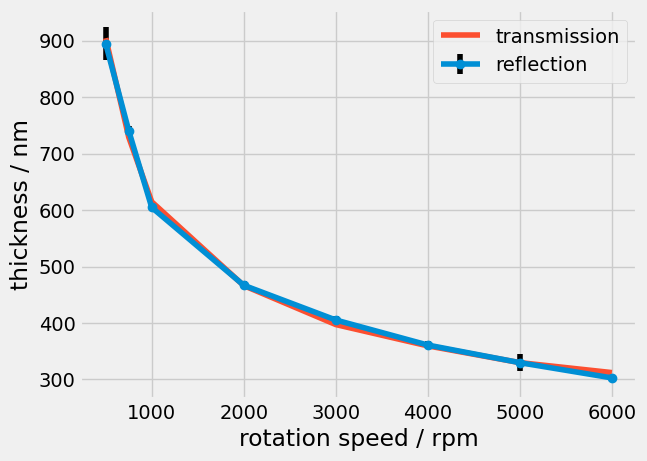

In [7]:
plt.errorbar(heterogeneity_ref[:,0],heterogeneity_ref[:,1], yerr= heterogeneity_ref[:,2],fmt='-o', ecolor='black', label  = 'reflection')

#plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission')
#
plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')
plt.legend()
#tikzplotlib.save("VglMethRotThick.tex")

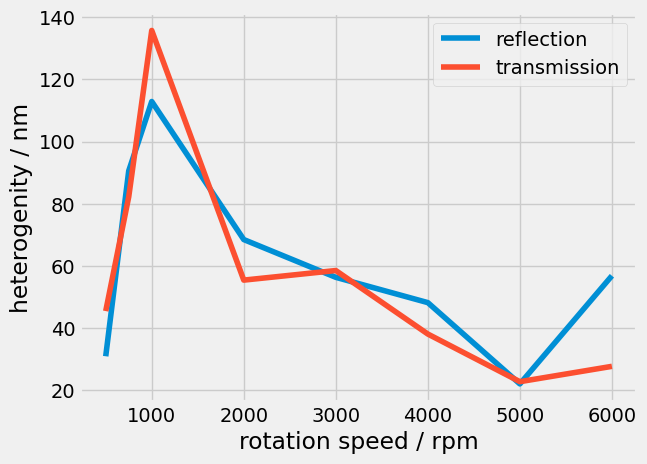

In [8]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,3], label = 'transmission')

plt.xlabel('rotation speed / rpm')
plt.ylabel('heterogenity / nm')

plt.legend()


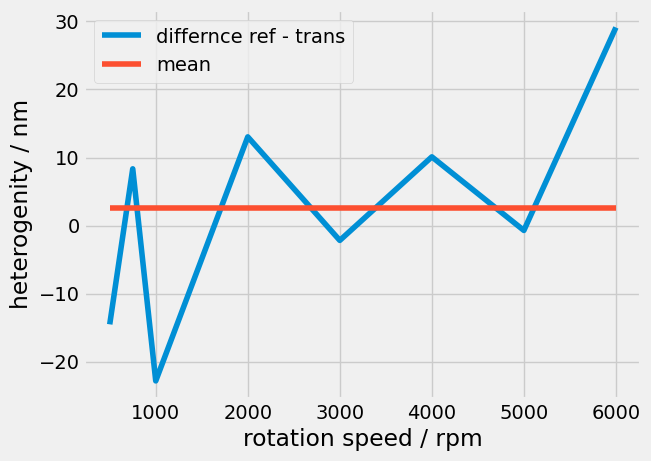

In [9]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3]- heterogeneity_trans[:,3], label  = 'differnce ref - trans')
plt.plot(heterogeneity_ref[:,0],np.ones(heterogeneity_ref[:,0].size) *np.mean(heterogeneity_ref[:,3]- heterogeneity_trans[:,3]), label  = 'mean')

plt.xlabel('rotation speed / rpm')
plt.ylabel('heterogenity / nm')

plt.legend()


## Plots Spectra

### Reflection

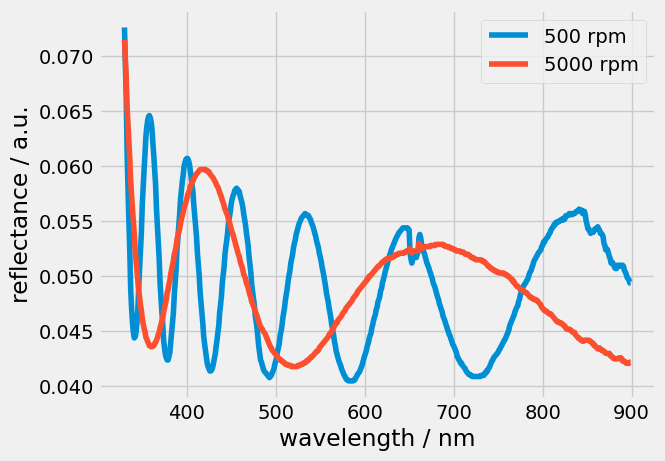

In [10]:
plt.plot(dfspec_ref500rpm.loc[:,'nm'], dfspec_ref500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_ref5000rpm.loc[:,'nm'], dfspec_ref5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('reflectance / a.u.')
plt.legend()

# tikzplotlib.save("VglMessmeth_refl_500adn5000.tex")

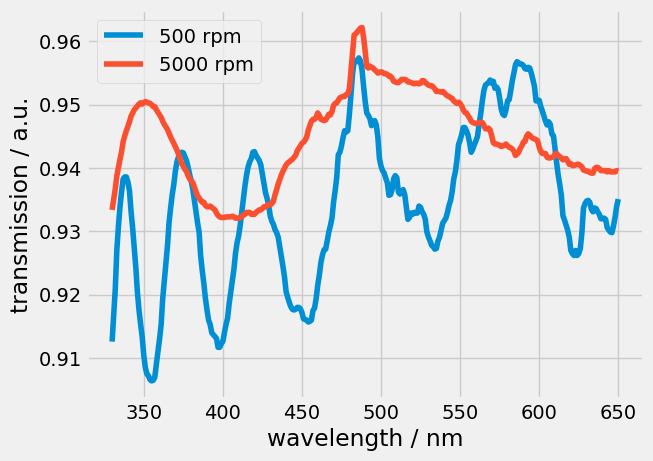

In [11]:
plt.plot(dfspec_trans500rpm.loc[:,'nm'], dfspec_trans500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_trans5000rpm.loc[:,'nm'], dfspec_trans5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('transmission / a.u.')
plt.legend()
# tikzplotlib.save("VglMessmeth_trans_500adn5000.tex")

## Compare std to fit

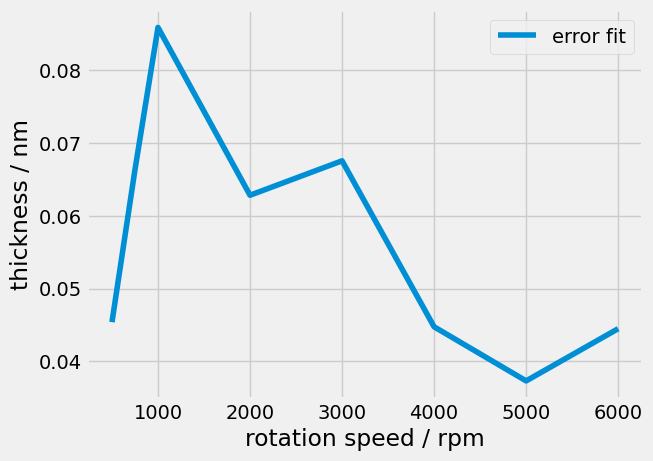

In [12]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,4], label  = 'error fit')
#plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,2], label  = 'std')
#plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,5], label  = 'div')
#plt.plot(heterogeneity_ref[:,0],np.ones(heterogeneity_ref[:,0].size) *np.mean(heterogeneity_ref[:,3]- heterogeneity_trans[:,3]), label  = 'mean')

plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')

plt.legend()


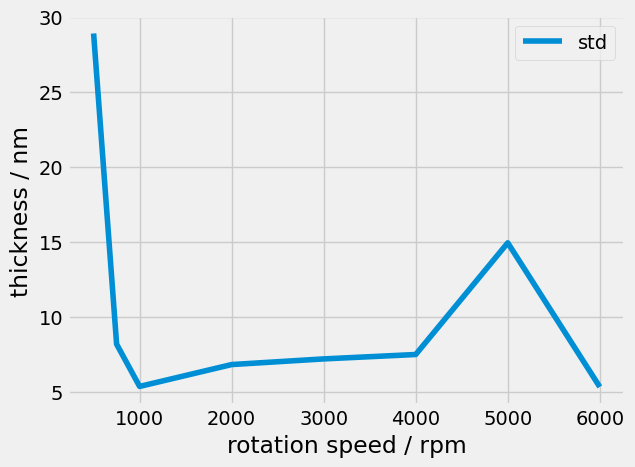

In [13]:
# plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,4], label  = 'error fit')
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,2], label  = 'std')
#plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,5], label  = 'div')
#plt.plot(heterogeneity_ref[:,0],np.ones(heterogeneity_ref[:,0].size) *np.mean(heterogeneity_ref[:,3]- heterogeneity_trans[:,3]), label  = 'mean')

plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')

plt.legend()


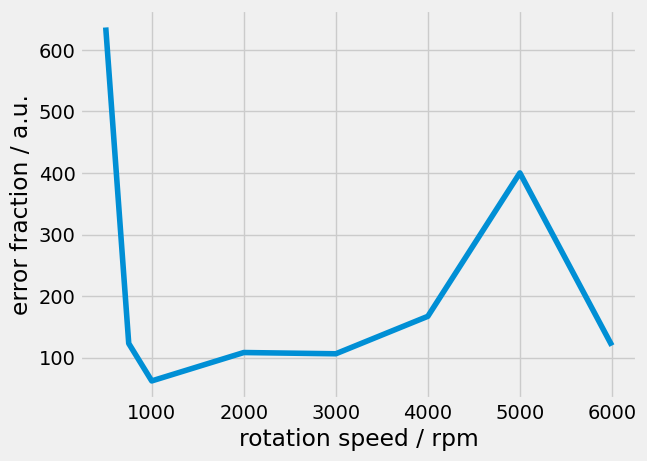

In [14]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,5])

plt.xlabel('rotation speed / rpm')
plt.ylabel('error fraction / a.u.')

#plt.legend()
tikzplotlib.save("VglMethErrorFrac.tex")

In [15]:
dfDataRef = pd.DataFrame(heterogeneity_ref, columns= ['rot. speed', 'thickness / nm', 'std / nm', 'thickness/std / a.u.', 'error fit / nm', 'std/error fit / a.u.']).round(2)
dfDataTrans = pd.DataFrame(heterogeneity_trans, columns= ['rot. speed', 'thickness / nm', 'std / nm', 'thickness/std / a.u.', 'error fit / nm', 'std/error fit / a.u.']).round(2)
dfDataTrans.to_latex('VglMethodRotTableRef.tex')
dfDataTrans.to_latex('VglMethodRotTableTrans.tex')

## Schubert Fit

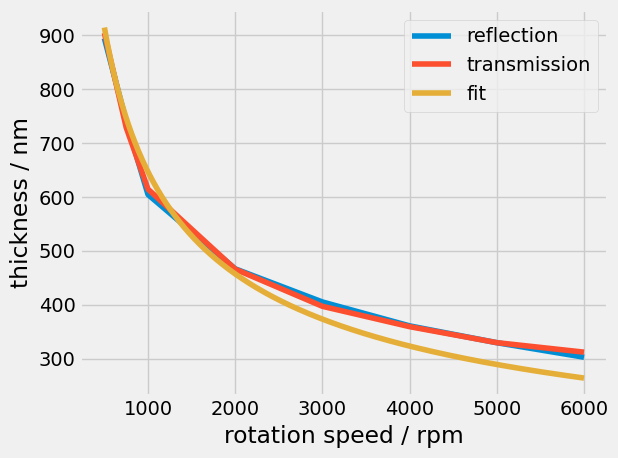

In [16]:
par, covarxdata =  curve_fit(schubertEquation2, heterogeneity_ref[:,0],heterogeneity_ref[:,1])
par1, cov1 = curve_fit(schubertEquation, heterogeneity_ref[:,0],heterogeneity_ref[:,1])
#print(par1[0])

xdata500to6000 = np.linspace(500,6000, 1000)
ydata500to6000 = schubertEquation2(xdata500to6000, par)

fig = plt.figure()
ax = plt.gca()

ax.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'reflection') # 

ax.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission') #
ax.plot(xdata500to6000,ydata500to6000, label = 'fit') #, label = 'fit'

ax.set_xlabel('rotation speed / rpm')
ax.set_ylabel('thickness / nm')
ax.legend()
plt.tight_layout()
plt.savefig("RotFit500to6000.pdf")

#tikzplotlib.save("RotFit500to6000.tex")


C:\Users\Leo\AppData\Local\Temp\ipykernel_3720\2378161507.py:5: RuntimeWarning: divide by zero encountered in divide
  return A*(1950/x)**0.5 * (100/20) * (35/100)**0.25


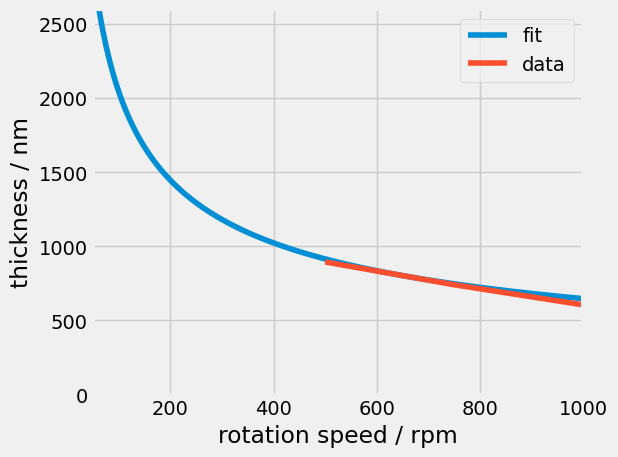

In [17]:

xdata0to1000 = np.linspace(0,1000, 1000)
ydata0to1000 = schubertEquation2(xdata0to1000, par)

plt.plot(xdata0to1000,ydata0to1000, label = 'fit')
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'data')
# plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission')


plt.xlim(50,1000)
plt.ylim(0,2600)

#
plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')
plt.legend()
plt.tight_layout()

plt.savefig('RotFit0to1000.pdf')
#tikzplotlib.save("RotFit0to1000.tex")

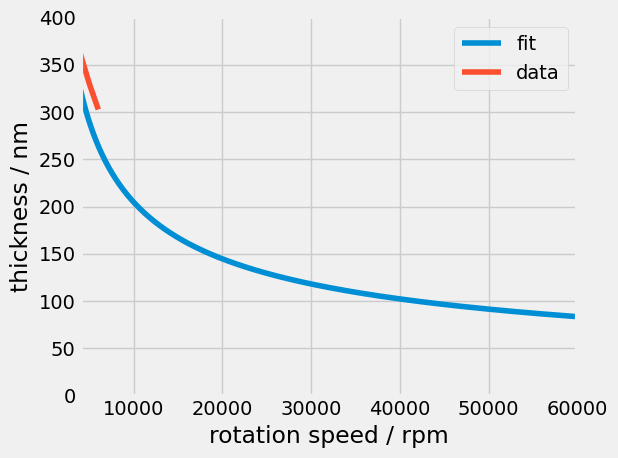

In [18]:
xdata5000to10000 = np.linspace(4000,60000, 1000)
ydata5000to10000 = schubertEquation2(xdata5000to10000, par)

plt.plot(xdata5000to10000,ydata5000to10000, label = 'fit')
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'data')
# plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission')


plt.xlim(4000,60000)
plt.ylim(0,400)

#
plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')
plt.legend()
plt.tight_layout()

plt.savefig('RotFit5000to10000.pdf')
#tikzplotlib.save("RotFit0to1000.te